<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">pySTALAGMITE</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);"><b style=color:red;>STALAGMITE</b> modelling</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
<td><img style="height: 150px;" src="images/pyTEMPLATE.png"></td>
</tr>
</table>

----
# `pySTALAGMITE`

pySTALAGMITE, a program package prediction the shape of a stalagmite from pre-defined climate conditions.

----
# Flux of calcite into solution
In this notebook, we review the **calcium fluxrate** $F_{Ca^{2+}}$, which describes the temporal flux of calcium 
from a surface into the solution.

We will use the library`libCHEM.py` for the reaction constants.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import libCHEM

----
## PWP equation

We first recall the dissolution equations along the solid-fluid interface from the previous notebook.

Along the interface solution-rock calcite is dissolved physically [e.g. Plummer et al., 1978]
$$
\begin{array}{rcl}
  {\rm CaCO}_3 + {\rm H}^+             
  & \overset{\kappa_1}{\underset{\kappa'_4}{\leftrightarrow}} & {\rm Ca}^{2+} + {\rm HCO}_3^- \\
  {\rm CaCO}_3 + {\rm H}_2{\rm CO}_3^0 
  & \overset{\kappa_2}{\underset{\kappa''_4}{\leftrightarrow}} & {\rm Ca}^{2+} + 2{\rm HCO}_3^- \\
  {\rm CaCO}_3 + {\rm H}_2{\rm O}      
  & \overset{\kappa_3}{\underset{\kappa'''_4}{\leftrightarrow}} & {\rm Ca}^{2+} + {\rm CO}_3^{2-} 
\end{array}
$$
Here, the $\kappa_i$ are rate coefficients.

- The first process is dissolution due to the presence of H$^+$ in a strongly acidic environment, 
- The second process is a direct reaction of calcite with the carbonic acid H$_2$CO$_3$, 
- The third process describes the physical dissolution of calcite in water. 

For pH-values larger than six, which is true for natural karst waters, the second reaction is negligible. 
For CO$_2$-pressures smaller than 0:01 atm, the third reaction is the dominant reaction. 

The calcite dissolution as a **fairly slow process** is also rate-limiting.

The **calcium flux rate** $F_{Ca^{2+}}$ [mol/m$^2$/s] has been determined experimentally by
measuring the dissolution rate of Iceland spar in large volumes of a rigorously stirred, turbulent solution
by Plummer et al. [1978]. From their experimental results, Plummer et al derived as analytical approximation 
the **PWP equation**:
$$\fbox{$
F_{Ca^{2+}} =
\kappa_1 \left( \rule[-2mm]{0cm}{6mm} {\rm H}^+ \right)_{\delta}
+ \kappa_2 \left( \rule[-2mm]{0cm}{6mm} {\rm H}_2{\rm CO}_3^* \right)_{\delta}
+ \kappa_3 
- \kappa_4 \left( \rule[-2mm]{0cm}{6mm} {\rm Ca}^{2+} \right)_{\delta} \left( {\rm HCO}_3^- \right)_{\delta}
$}$$
Here, $(X_i)$ indicates activities of $X_i$, and the sub-script $\delta$ the interface solid-fluid.

We can solve the PWP equation by calculating the activities of
hydrogen, water, calcium, and bicarbonate by numerical means...

... or we use **experimentally-derived** fluxrate laws, as described below.

## Flux-rate laws
Dissolution experiments of limestone, performed by Buhmann and Dreybrodt [1985a,b], have been fitted 
with a simplified **flux-rate law**:
$$
F_{Ca^{2+}} =
k_i \left( 1  - \frac{[\textrm{Ca}^{2+}]}{[\textrm{Ca}^{2+}]_{eq}} \right)^{n_i}
$$

In [2]:
TC   = np.array([10,20])
pco2 = np.array([0.001,0.01,0.1])

c    = np.linspace(0.2,5,201)
ceq  = np.zeros(3*3).reshape(3,3)
F    = np.zeros(len(c)*3*3).reshape(len(c),3,3)
print(c.shape,ceq.shape,F.shape)

for t in range(len(TC)):
    for p in range(len(pco2)):
        ceq[t][p] = libCHEM.CEQ_limestone_open (TC[t],pco2[p])
        for i in range(len(c)):
            F[i][t][p] = libCHEM.FCaCO3(c[i],ceq[t][p])

(201,) (3, 3) (201, 3, 3)


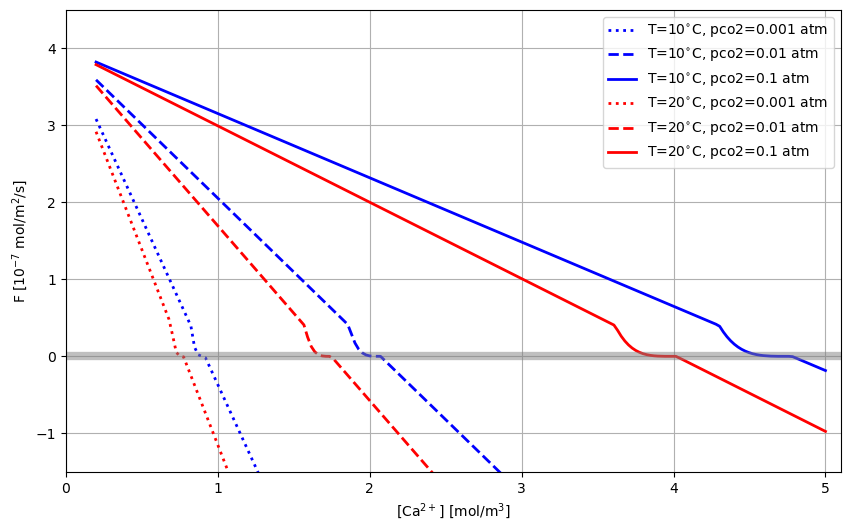

In [9]:
plt.figure(figsize=(10,6))
plt.xlim(0,5.1)
plt.xlabel('[Ca$^{2+}$] [mol/m$^3$]')
plt.ylabel('F [$10^{-7}$ mol/m$^2$/s]')
plt.ylim(-1.5,4.5)
plt.plot(c,F[:,0,0]*1e7,linewidth=2,linestyle='dotted',color='blue',label='T=10$^{\circ}$C, pco2=0.001 atm')
plt.plot(c,F[:,0,1]*1e7,linewidth=2,linestyle='dashed',color='blue',label='T=10$^{\circ}$C, pco2=0.01 atm')
plt.plot(c,F[:,0,2]*1e7,linewidth=2,linestyle='solid', color='blue',label='T=10$^{\circ}$C, pco2=0.1 atm')
plt.plot(c,F[:,1,0]*1e7,linewidth=2,linestyle='dotted',color='red',label='T=20$^{\circ}$C, pco2=0.001 atm')
plt.plot(c,F[:,1,1]*1e7,linewidth=2,linestyle='dashed',color='red',label='T=20$^{\circ}$C, pco2=0.01 atm')
plt.plot(c,F[:,1,2]*1e7,linewidth=2,linestyle='solid', color='red',label='T=20$^{\circ}$C, pco2=0.1 atm')
plt.plot([0,5.1],[0,0],lw=6,color='gray',alpha=0.5)
plt.legend()
plt.grid()
plt.savefig('images/CHEM_FCaCO3.png')

----
## Literature

- Dreybrodt, Laukner, Svensson, Liu, Buhmann (1996). <br> **The kinetics of the reaction CO2 + H2O → H+ + HCO3− as one of the rate limiting steps for the dissolution of calcite in the system H2OCO2CaCO3**, Geochim. Cosmochim. Acta, 60(18):3375–3381
- Millero, Graham, Huang, Bustos-Serrano, Pierrot (2006). **Dissociation constants of carbonic acid in seawater as a function of salinity and temperature**,
Marine Chemistry 100(1-2):80-94.
- Schulz, Riebesell, Rost, Toms, Zeebe (2006): **Determination of the rate constants for the carbon dioxide to
bicarbonate inter-conversion in pH-buffered seawater systems**,
Marine Chemistry 100 (2006) 53–65.
- L. N. Plummer, T. M. L. Wigley and D. L. Parkhurst (1978).<br>**The kinetics of calcite dissolution in CO$_2$ -water systems at 5 degrees to 60 degrees C and 0.0 to 1.0 atm CO$_2$**, American Journal of Science February 278 (2) 179-216; 
[doi: 10.2475/ajs.278.2.179](https://doi.org/10.2475/ajs.278.2.179) 

- Buhmann, D., Dreybrodt, W. (1985).<br>**The kinetics of calcite dissolution and precipitation in geologically relevant situations of karst areas. 2. Closed system.** Chemical Geology, 53 (1). 109-124 [doi: 10.1016/0009-2541(85)90024-5](https://doi.org/10.1016/0009-2541(85)90024-5)
- Dreybrodt, Laukner, Svensson, Liu, Buhmann (1996). <br> **The kinetics of the reaction CO$_2$ + H$_2$O → H$^+$ + HCO$_3^−$ as one of the rate limiting steps for the dissolution of calcite in the system H$_2$O-CO$_2$-CaCO$_3$**, Geochim. Cosmochim. Acta, 60(18):3375–3381

----